# F1 Project Functional Model

1. [Libraries](#1)
2. [Data Preparation](#2)
3. [Model Creating and Model Summary](#3)
4. [Model Training](#4)
5. [Visualization](#5)

<a id = '1'></a>
## Libraries

In [20]:
#Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import layers

<a id = '2'></a>
## Data Preparation

In [13]:
#Directory 
base_dir = r'C:/Users/gorke/Desktop/dataf1'

#Data generating
trainDatagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.1)
testDatagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.1)

#Flow from directory
trainDatagen = trainDatagen.flow_from_directory(base_dir, target_size = (500,500), subset = 'training', batch_size = 2)
testDatagen = testDatagen.flow_from_directory(base_dir, target_size = (500,500), subset = 'validation', batch_size = 2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


<a id = '3'></a> 
## Model Creating and Model Summary

In [8]:
input_ = Input(shape = (500, 500, 3))

#model creating
conv11 = layers.Conv2D(4, (2,2), activation = 'elu')(input_)
max11 = layers.MaxPooling2D((2,2))(conv11)
conv12 = layers.Conv2D(8, (2,2), activation = 'elu')(max11)
max12 = layers.MaxPooling2D((2,2))(conv12)
flat1 = layers.Flatten()(max12)

conv21 = layers.Conv2D(4, (3,3), activation = 'elu')(input_)
max21 = layers.MaxPooling2D((2,2))(conv21)
conv22 = layers.Conv2D(8, (2,2), activation = 'elu')(max21)
max22 = layers.MaxPooling2D((2,2))(conv22)
flat2 = layers.Flatten()(max22)

#concatenating
merge = concatenate([flat1, flat2])

#fully connected
fc1 = layers.Dense(50, activation = 'elu')(merge)
fc2 = layers.Dense(100, activation = 'elu')(fc1)
fc3 = layers.Dense(100, activation = 'elu')(fc2)
fc4 = layers.Dense(50, activation = 'elu')(fc3)
out = layers.Dense(4, activation = 'softmax')(fc4)

#model 
model = Model(inputs = input_, outputs= out)

In [9]:
#model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 500, 500, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 499, 499, 4)  52          ['input_5[0][0]']                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 498, 498, 4)  112         ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 249, 249, 4)  0          ['conv2d_8[0][0]']           

<a id = '4'></a>
## Model Training 

In [15]:
#optimizer 
optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001)

#loss
loss = tf.keras.losses.CategoricalCrossentropy()

#model compiling
model.compile(optimizer = optimizer, loss = loss, metrics = ['mse', 'accuracy'])

#training
result = model.fit(trainDatagen, epochs = 10, verbose = 1, validation_data = testDatagen)

Epoch 1/10
126/126 [==============================] - 9s 46ms/step - loss: 3.7737 - mse: 0.1995 - accuracy: 0.4444 - val_loss: 2.1679 - val_mse: 0.2620 - val_accuracy: 0.2857
Epoch 2/10
126/126 [==============================] - 6s 44ms/step - loss: 0.6872 - mse: 0.0852 - accuracy: 0.7619 - val_loss: 1.9314 - val_mse: 0.2102 - val_accuracy: 0.3571
Epoch 3/10
126/126 [==============================] - 6s 44ms/step - loss: 0.4037 - mse: 0.0581 - accuracy: 0.8294 - val_loss: 1.4779 - val_mse: 0.1849 - val_accuracy: 0.4643
Epoch 4/10
126/126 [==============================] - 6s 44ms/step - loss: 0.2417 - mse: 0.0334 - accuracy: 0.9167 - val_loss: 2.1994 - val_mse: 0.2335 - val_accuracy: 0.4286
Epoch 5/10
126/126 [==============================] - 6s 45ms/step - loss: 0.1099 - mse: 0.0126 - accuracy: 0.9802 - val_loss: 2.2889 - val_mse: 0.1941 - val_accuracy: 0.5000
Epoch 6/10
126/126 [==============================] - 6s 46ms/step - loss: 0.0698 - mse: 0.0085 - accuracy: 0.9802 - val_loss

<a id = '5'></a>
## Visualization 

In [19]:
#data preparation
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
acc_loss = result.history['loss']
val_loss = result.history['val_loss']
epoch = range(1, len(acc)+1)

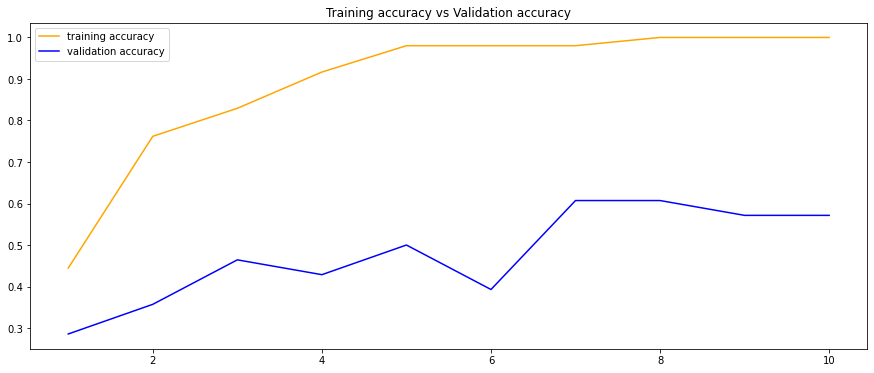

In [21]:
#plotting training accuracy and validation accuracy
plt.figure(figsize = (15,6))
plt.plot(epoch, acc, label = ('training accuracy'), color = 'orange')
plt.plot(epoch, val_acc, label = ('validation accuracy'), color = 'blue')
plt.title('Training accuracy vs Validation accuracy')
plt.legend()
plt.show()

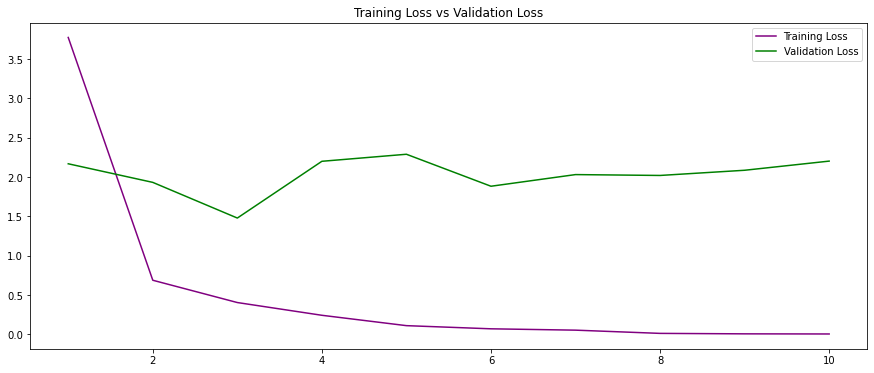

In [22]:
#plotting training loss and validation loss
plt.figure(figsize = (15,6))
plt.plot(epoch, acc_loss, label = ('Training Loss'), color = 'purple')
plt.plot(epoch, val_loss, label = ('Validation Loss'), color = 'green')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()